# Titanic Data set

# Exploratory Data Analysis (EDA)

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [12]:
train = pd.read_csv("train.csv")

In [15]:
train.shape

(891, 12)

In [13]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
# Checking for total null values 
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
#Cabin, Age and Embarked have null values
#Now fix these columns

### How many Survived?

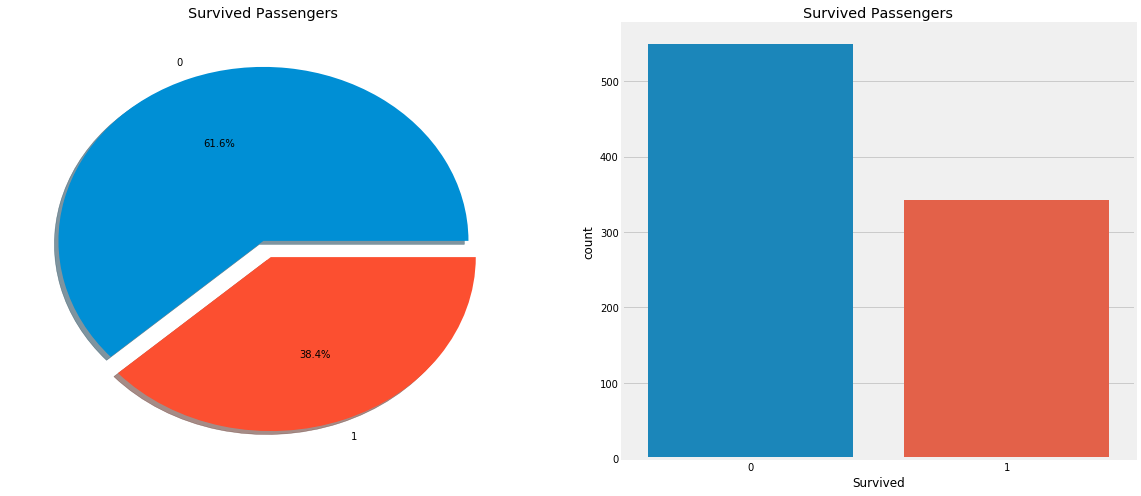

In [17]:
# Lets plot the The total percentage and count of the passengers Survied
#  and died in Titanic using pie and count plot
fig, axes = plt.subplots(1,2, figsize=(18,8))
train['Survived'].value_counts().plot.pie(explode= [0,0.1],autopct='%1.1f%%', ax =axes[0],shadow=True)
axes[0].set_title('Survived Passengers')
axes[0].set_ylabel('')
sns.countplot('Survived', data= train, ax= axes[1])
axes[1].set_title('Survived Passengers')
plt.show()

From the above Plot we can easily see that very less amount of people survived in the insident.
Only 38 % people survived majority of them died. In the later session we will see that which passenger are survied and do differnt comparisons on different features, i.e. Age, Embarcation, Sex, port etc.